In [1]:
import numpy as np
from sklearn.metrics import r2_score
import torch
import os, gc
from climsim_utils.data_utils import *
from tqdm import tqdm
# import modulus
import sys
# from pao_model import PaoModel

sys.path.append('/global/cfs/cdirs/m4334/jerry/climsim3_dev/baseline_models/pao_model/training_v6/')

pao_model_path_torchscript = '/global/homes/j/jerrylin/scratch/hugging/E3SM-MMF_ne4/saved_models/climsim3_ensembles_v6/pao_model/pao_model_seed_43/model.pt'
pao_model_path_modulus = '/global/homes/j/jerrylin/scratch/hugging/E3SM-MMF_ne4/saved_models/climsim3_ensembles_v6/pao_model/pao_model_seed_43/model.mdlus'

device = torch.device('cuda')

# # torchscript_model = torch.jit.load(pao_model_path_torchscript).to(device)
# modulus_model = modulus.Module.from_checkpoint(pao_model_path_modulus).to(device)
# # torchscript_model.eval()
# modulus_model.eval()

In [2]:
print(torch.__version__)
from pao_model import PaoModel

2.2.0a0+81ea7a4


Text(0.5, 0, 'input_profile_num')

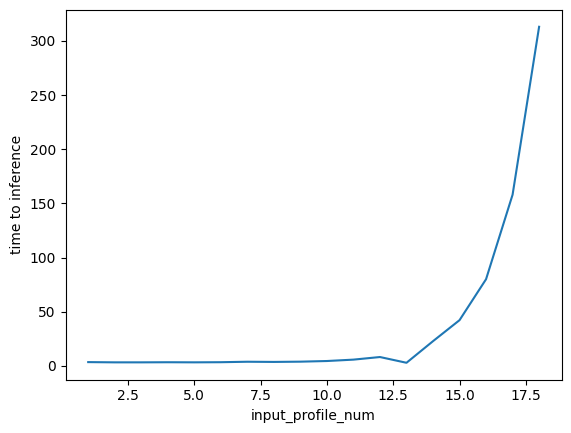

In [5]:
inf_times = [3.47, 3.25, 3.25, 3.35, 3.26, 3.38, 3.81, 3.64, \
             3.88, 4.48, 5.76, 8.16, 2.85, 22.8, 42.2, 80.0, \
             158.0, 313.0]

plt.plot(np.arange(len(inf_times))+1, inf_times)
plt.ylabel("time to inference")
plt.xlabel("input_profile_num")

In [ ]:
old_torchscript_model = torch.jit.load('/global/homes/j/jerrylin/scratch/hugging/E3SM-MMF_ne4/saved_models/climsim3_ensembles/pao_model/pao_model_seed_43/model.pt').to(device)

In [ ]:
check_inf(old_torchscript_model)

In [ ]:
def count_trainable_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def check_inf(model):
    rand_batch = torch.rand(2, 1399).to(device)
    with torch.no_grad():
        pred = model(rand_batch)
        print('first batch done')
        pred = model(rand_batch)
        print('second batch done')

In [ ]:
loaded_model = torch.load('new_model.pth')

In [ ]:
type(loaded_model)

In [ ]:
check_inf(loaded_model)

In [ ]:
induct_model = torch.compile(loaded_model, backend = 'inductor')

In [ ]:
induct_model.eval()

In [ ]:
scripted_model = torch.jit.script(loaded_model)
scripted_model.eval()

In [ ]:
check_inf(induct_model)

In [ ]:
check_inf(scripted_model)

In [ ]:
check_inf(modulus_model)

In [ ]:
type(modulus_model)

In [ ]:
# check_inf(torchscript_model)

In [ ]:
check_inf(torchscript_model_2)

In [ ]:
new_model = PaoModel(
                input_profile_num = 23,
                input_scalar_num = 19,
                target_profile_num = 5,
                target_scalar_num = 8,
                output_prune = True,
                strato_lev_out = 12,
                loc_embedding = False,
                embedding_type = "positional",
                hidden_profile_num = 160,
                hidden_scalar_num = 160,
            ).to(device)

In [ ]:
new_model.load_state_dict(modulus_model.state_dict())

In [ ]:
type(new_model)

In [ ]:
torch.save(new_model, 'new_model.pth')

In [ ]:
loaded_model = torch.load('new_model.pth')

In [ ]:
type(loaded_model)

In [ ]:
loaded_model.eval()

In [ ]:
check_inf(loaded_model)

In [ ]:
from climsim_utils.data_utils import *
import numpy as np
import xarray as xr

In [ ]:
grid_info = xr.open_dataset('/global/cfs/cdirs/m4334/jerry/climsim3_dev/grid_info/ClimSim_low-res_grid-info.nc')
input_mean = xr.open_dataset('/global/cfs/cdirs/m4334/jerry/climsim3_dev/preprocessing/normalizations/inputs/input_mean_v2_rh_mc_pervar.nc')
input_max = xr.open_dataset('/global/cfs/cdirs/m4334/jerry/climsim3_dev/preprocessing/normalizations/inputs/input_max_v2_rh_mc_pervar.nc')
input_min = xr.open_dataset('/global/cfs/cdirs/m4334/jerry/climsim3_dev/preprocessing/normalizations/inputs/input_min_v2_rh_mc_pervar.nc')
output_scale = xr.open_dataset('/global/cfs/cdirs/m4334/jerry/climsim3_dev/preprocessing/normalizations/outputs/output_scale_std_lowerthred_v2_rh_mc.nc')
data = data_utils(grid_info = grid_info, 
                  input_mean = input_mean, 
                  input_max = input_max, 
                  input_min = input_min, 
                  output_scale = output_scale)
data.set_to_v2_rh_mc_vars()

In [ ]:
plt.hist(data.lats)

In [ ]:
train_set_paths = [f'/pscratch/sd/j/jerrylin/hugging/E3SM-MMF_ne4/preprocessing/v2_rh_mc/train_set/{x}/' for x in \
                   ['11', '12', '21', '22', '31', '32', '41', '42', '51', '52', '61', '62', '71', '72']]
train_input = np.concatenate([np.load(f'{train_set_path}/train_input.npy') for train_set_path in train_set_paths], axis = 0)

In [ ]:
npy_mean = np.mean(train_input, axis = 0)
npy_std = np.std(train_input, axis = 0)

In [ ]:
grid_info = xr.open_dataset('/global/cfs/cdirs/m4334/jerry/climsim3_dev/grid_info/ClimSim_low-res_grid-info.nc')
input_mean = xr.open_dataset('/global/cfs/cdirs/m4334/jerry/climsim3_dev/preprocessing/normalizations/inputs/input_mean_v2_rh_mc_pervar.nc')
input_max = xr.open_dataset('/global/cfs/cdirs/m4334/jerry/climsim3_dev/preprocessing/normalizations/inputs/input_max_v2_rh_mc_pervar.nc')
input_min = xr.open_dataset('/global/cfs/cdirs/m4334/jerry/climsim3_dev/preprocessing/normalizations/inputs/input_min_v2_rh_mc_pervar.nc')
output_scale = xr.open_dataset('/global/cfs/cdirs/m4334/jerry/climsim3_dev/preprocessing/normalizations/outputs/output_scale_std_lowerthred_v2_rh_mc.nc')
data = data_utils(grid_info = grid_info, 
                  input_mean = input_mean, 
                  input_max = input_max, 
                  input_min = input_min, 
                  output_scale = output_scale)
data.set_to_v2_rh_mc_vars()
input_sub, input_div, out_scale = data.save_norm(write=False)

In [ ]:
train_input.shape

In [ ]:
train_input[0,0]

In [ ]:
num_samples = 20000000
np.sum(train_input[:num_samples,:10], axis=0)/num_samples

In [ ]:
import matplotlib.pyplot as plt
plt.hist(train_input[:,0], bins=100)
plt.show()
#np.nanmean(train_input[:,:10], axis=0)

In [ ]:
train_input[:,0][:60]

In [ ]:
np.mean(train_input, axis = 0)[0:60]

In [ ]:
np.mean(train_input, axis = 0, dtype = np.float64)[0:60]

In [ ]:
16777215/60

In [ ]:
print(npy_mean[:60])

In [ ]:
print(input_sub[:60])

In [ ]:
path_dict = {
input_mean_path: '/global/cfs/cdirs/m4334/jerry/climsim3_dev/preprocessing/normalizations/inputs/input_mean_v2_rh_mc_pervar.nc'
input_max_path: '/global/cfs/cdirs/m4334/jerry/climsim3_dev/preprocessing/normalizations/inputs/input_max_v2_rh_mc_pervar.nc'
input_min_path: '/global/cfs/cdirs/m4334/jerry/climsim3_dev/preprocessing/normalizations/inputs/input_min_v2_rh_mc_pervar.nc'}

In [ ]:
10089984/2

In [ ]:
woah.shape

### Instantiating class

The example below will save training data in both .h5 and .npy format. Adjust if you only need one format. Also adjust input_abbrev to the input data files you will use. We expanded the original '.mli.' input files to include additional features such as previous steps' information, and '.mlexpand.' was just an arbitrary name we used for the expanded input files.

Currently the training script would assume the training set is in .h5 format while the validation set is in .npy form. It's fine to only keep save_h5=True in the block below for generating training data.

In [ ]:
grid_path = '/global/u2/z/zeyuanhu/nvidia_codes/Climsim_private/grid_info/ClimSim_low-res_grid-info.nc'
norm_path = '/global/u2/z/zeyuanhu/nvidia_codes/Climsim_private/preprocessing/normalizations/'

grid_info = xr.open_dataset(grid_path)
#no naming issue here. Here these normalization-related files are just placeholders since we set normalize=False in the data_utils.
input_mean = xr.open_dataset(norm_path + 'inputs/input_mean_v5_pervar.nc')
input_max = xr.open_dataset(norm_path + 'inputs/input_max_v5_pervar.nc')
input_min = xr.open_dataset(norm_path + 'inputs/input_min_v5_pervar.nc')
output_scale = xr.open_dataset(norm_path + 'outputs/output_scale_std_lowerthred_v5.nc')


In [ ]:
data.input_vars

### Create training data

Below is an example of creating the training data by integrating the 7 year climsim simulation data. A subsampling of 1000 is used as an example. In the actual work we did, we used a stride_sample=1. We could not fit the full 7-year data into the memory wihout subsampling. If that's also the case for you, try to only process a subset of data at one time by adjusting regexps in set_regexps method. We saved 14 separate input .h5 files. For each year, we saved two files by setting start_idx=0 or 1. We have a folder like v2_full, which includes 14 subfolders named '11', '12', '21', '22', ..., '71','72', and each subfolder contains a train_input.h5 and train_target.h5. How you split to save training data won't influence the training. The training script will read in all the samples and randomly select samples across all the samples to form each batch.

In [ ]:
# set regular expressions for selecting training data
data.set_regexps(data_split = 'train', 
                regexps = ['E3SM-MMF.mlexpand.000[1234567]-*-*-*.nc', # years 1 through 7
                        'E3SM-MMF.mlexpand.0008-01-*-*.nc']) # first month of year 8
# set temporal subsampling
data.set_stride_sample(data_split = 'train', stride_sample = 1000)
# create list of files to extract data from
data.set_filelist(data_split = 'train', start_idx=0)
# save numpy files of training data
data.save_as_npy(data_split = 'train', save_path = '/global/homes/z/zeyuanhu/scratch/hugging/E3SM-MMF_ne4/preprocessing/v2_example/')

### Create validation data

In [ ]:
# set regular expressions for selecting validation data
data.set_regexps(data_split = 'val',
                 regexps = ['E3SM-MMF.mlexpand.0008-0[23456789]-*-*.nc', # months 2 through 9 of year 8
                            'E3SM-MMF.mlexpand.0008-1[012]-*-*.nc', # months 10 through 12 of year 8
                            'E3SM-MMF.mlexpand.0009-01-*-*.nc']) # first month of year 9
# set temporal subsampling
# data.set_stride_sample(data_split = 'val', stride_sample = 7)
data.set_stride_sample(data_split = 'val', stride_sample = 700)
# create list of files to extract data from
data.set_filelist(data_split = 'val')
# save numpy files of validation data
data.save_as_npy(data_split = 'val', save_path = '/global/homes/z/zeyuanhu/scratch/hugging/E3SM-MMF_ne4/preprocessing/v2_example/')

### Create test data

In [ ]:
data.data_path = '/global/homes/z/zeyuanhu/scratch/hugging/E3SM-MMF_ne4/_test/'

data.set_to_v4_vars()

# set regular expressions for selecting validation data
data.set_regexps(data_split = 'test',
                 regexps = ['E3SM-MMF.mlexpand.0009-0[3456789]-*-*.nc', 
                            'E3SM-MMF.mlexpand.0009-1[012]-*-*.nc',
                            'E3SM-MMF.mlexpand.0010-*-*-*.nc',
                            'E3SM-MMF.mlexpand.0011-0[12]-*-*.nc'])
# set temporal subsampling
# data.set_stride_sample(data_split = 'test', stride_sample = 7)
data.set_stride_sample(data_split = 'test', stride_sample = 700)
# create list of files to extract data from
data.set_filelist(data_split = 'test')
# save numpy files of validation data
data.save_as_npy(data_split = 'test', save_path = '/global/homes/z/zeyuanhu/scratch/hugging/E3SM-MMF_ne4/preprocessing/v2_example/')

In [ ]:
!ls /global/homes/z/zeyuanhu/scratch/hugging/E3SM-MMF_ne4/preprocessing/v2_example/